<a href="https://colab.research.google.com/github/Todah01/Summoners-War-Analysis/blob/main/sw_siege_battle_new_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
# !sudo apt-get install wkhtmltopdf
!rm ~/.cache/matplotlib -rf
# !pip install imgkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 10 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,150 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and dire

#Data Setting

In [ ]:
import pandas as pd
import operator
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.patches as patches
import copy
# import imgkit
from google.colab import files
from collections import defaultdict

In [ ]:
plt.rc('font', family='NanumBarunGothic', size = 15)
plt.rcParams["figure.figsize"] = (14,10)

In [ ]:
def make_multiple_of_five(num):
    if num % 5 == 0:
        return num
    else:
        return num + (5 - num % 5)

def remove_duplication(df_ldmon_list, new_df):
  relation_list = []
  for info in df_ldmon_list['몬스터']:
    temp_list_3 = []
    temp_list_cnt = 3
    for idx in range(len(new_df)):
      temp_list_str = ""
      for check in check_list:
        temp_str = re.sub('\s+', '', new_df.iloc[idx][check])
        if temp_str == info:
          temp_list_str += ' '.join([new_df.iloc[idx]['몬스터1'], new_df.iloc[idx]['몬스터2'], new_df.iloc[idx]['몬스터3']
                                    , str(new_df.iloc[idx]['등장횟수'])+"회"])
          if len(temp_list_3) != temp_list_cnt:
            temp_list_3.append(temp_list_str)
          else:
            break

          break
    relation_list.append(temp_list_3)
  return relation_list

def remove_empty_member_of_list(df):
  remove_idx_list = []
  for idx in range(len(df)):
    if df['몬스터'].iloc[idx] == '0':
      remove_idx_list.append(idx)

  df = df.drop(remove_idx_list)

  return df

In [ ]:
csv_base_name_list = ["star4_all_mon.csv", "star5_all_mon.csv", "star4_all_combi.csv", "star5_all_combi.csv"]
csv_save_count_list = ["star4_save_count.csv", "star5_save_count.csv", "star_ldnat5_save_count.csv"]
MONSTER_LDNAT4_LIST = ['프랑켄', '아수라', '팬텀시프','야만왕', '네오스톤파이터', '요괴무사', '머메이드', '주사위술사', '마법검사', '쿵푸걸', '늑대인간','차크람무녀', '부메랑전사', '호루스', '꿈냥이', '조커']

df_star4_mon = pd.read_csv(csv_base_name_list[0], encoding='CP949')
df_star5_mon = pd.read_csv(csv_base_name_list[1], encoding='CP949')
df_star4_combi = pd.read_csv(csv_base_name_list[2], encoding='CP949')
df_star5_combi = pd.read_csv(csv_base_name_list[3], encoding='CP949')
df_star4_savecnt = pd.read_csv(csv_save_count_list[0], encoding='CP949')
df_star5_savecnt = pd.read_csv(csv_save_count_list[1], encoding='CP949')
df_ldnat5_savecnt = pd.read_csv(csv_save_count_list[2], encoding='CP949')

df_star4_mon = remove_empty_member_of_list(df_star4_mon)
df_star5_mon = remove_empty_member_of_list(df_star5_mon)

df_combi_list = [df_star4_combi, df_star5_combi]
df_mon_list = [df_star4_mon]
df_savecnt_list = [df_star4_savecnt, df_star5_savecnt, df_ldnat5_savecnt]

#Monster Analysis

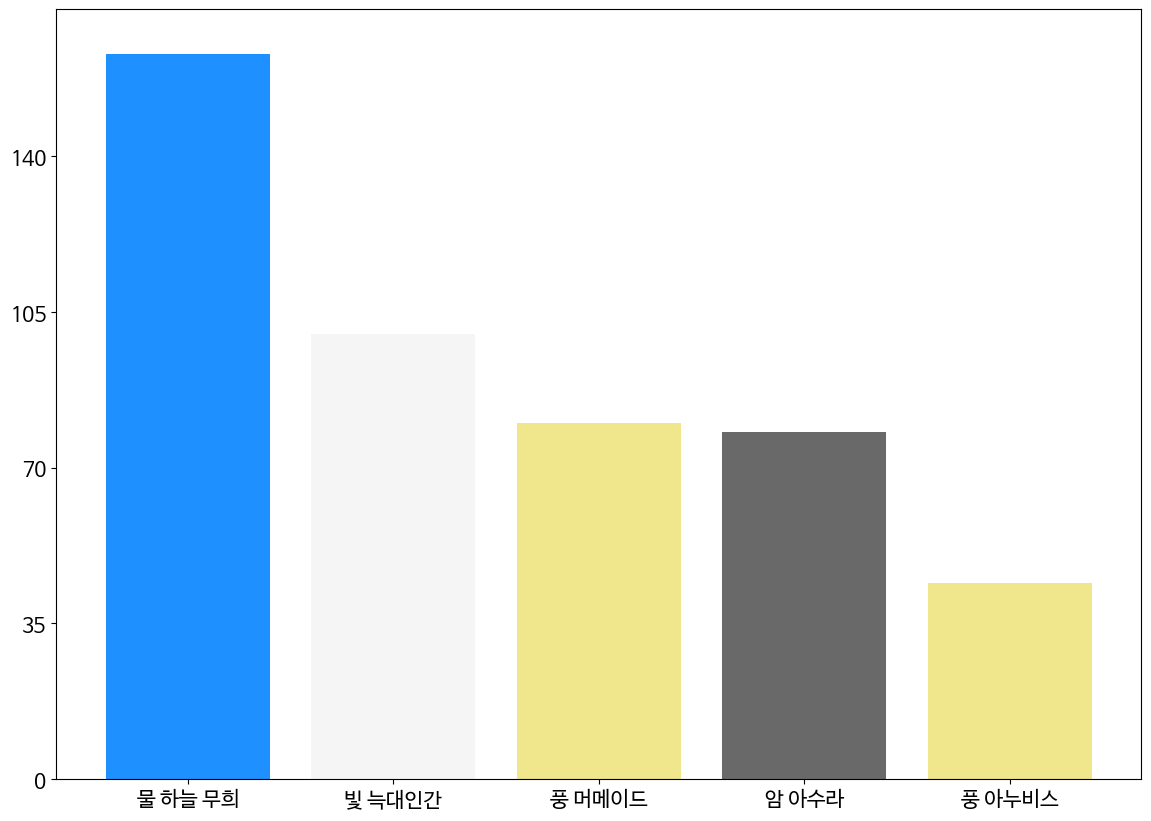

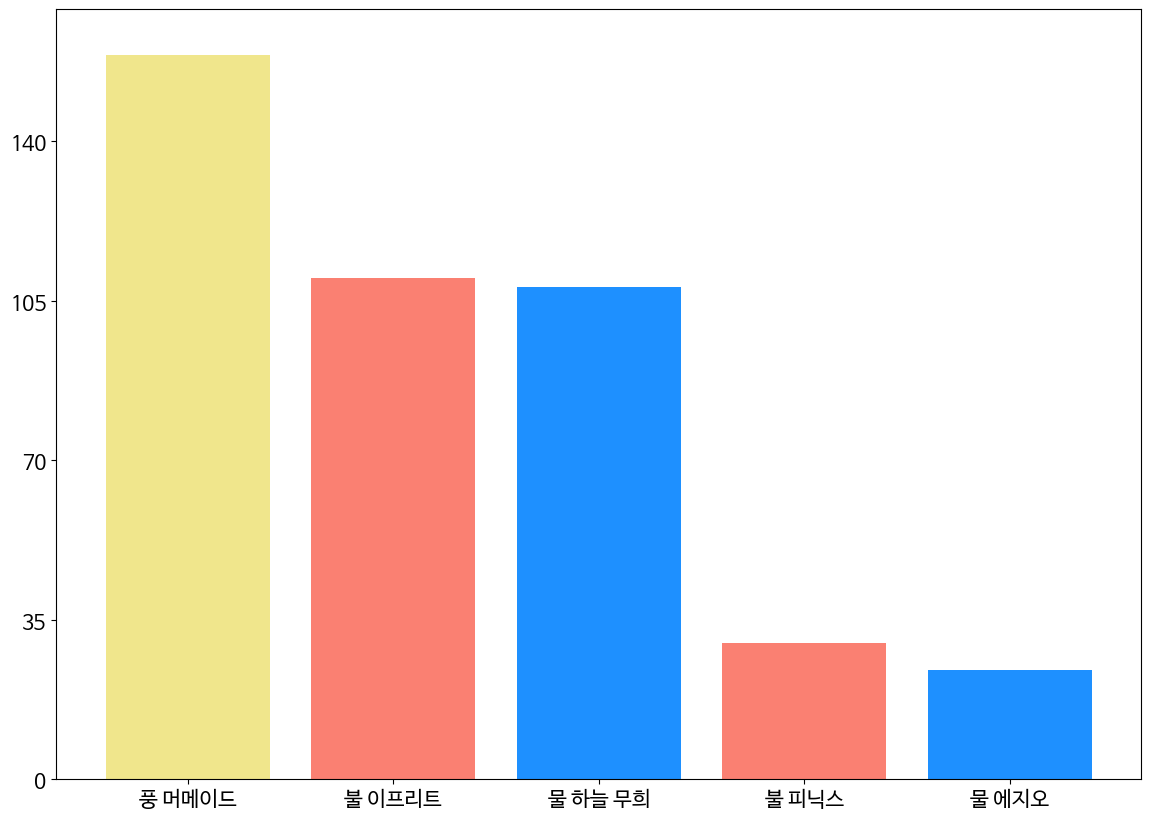

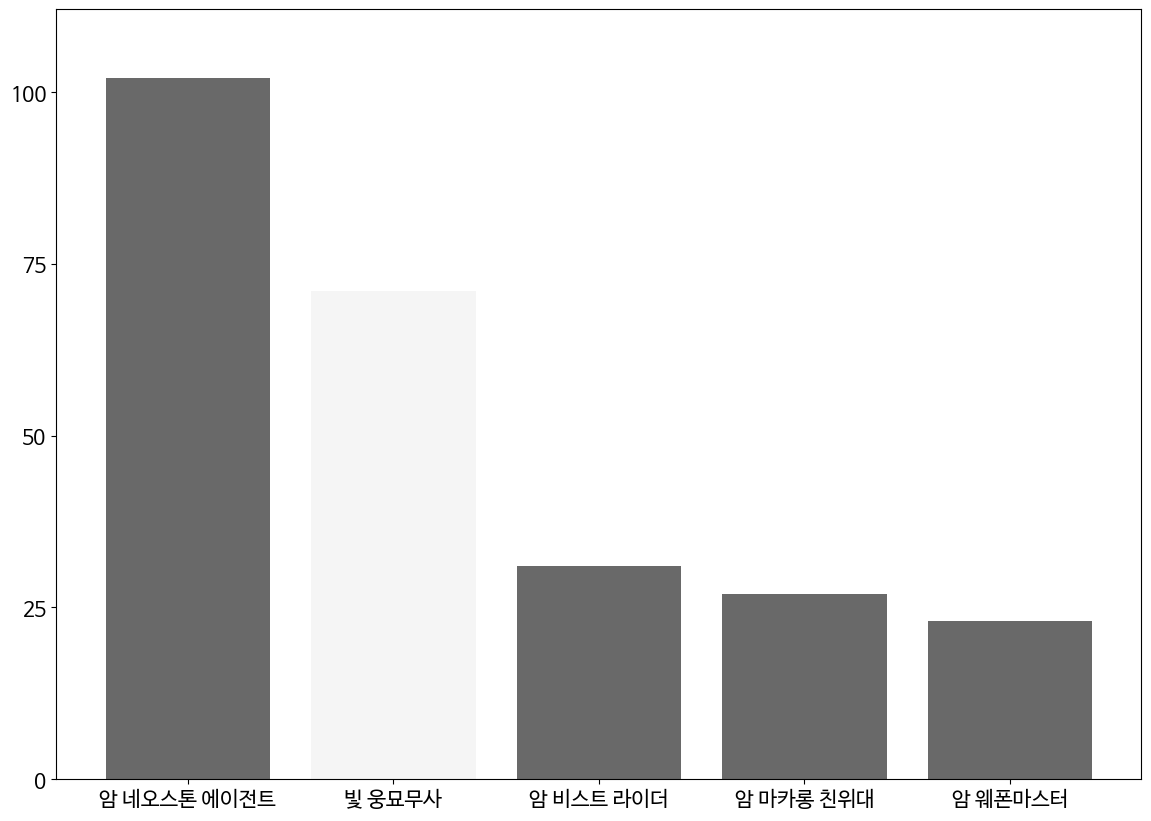

In [ ]:
starld5_mon_list = []
starld5_cnt_list = []
star5_mon_list = []
star5_cnt_list = []

for idx in range(len(df_star5_mon)):
  temp_str = re.sub('\s+', '', df_star5_mon.iloc[idx]['몬스터'])
  if temp_str[0] == '빛' or temp_str[0] == '암':
    if temp_str[1:] not in MONSTER_LDNAT4_LIST:
      starld5_mon_list.append(df_star5_mon.iloc[idx]['몬스터'])
      starld5_cnt_list.append(df_star5_mon.iloc[idx]['횟수'])
    else:
      star5_mon_list.append(df_star5_mon.iloc[idx]['몬스터'])
      star5_cnt_list.append(df_star5_mon.iloc[idx]['횟수'])
  elif temp_str != '0':
    star5_mon_list.append(df_star5_mon.iloc[idx]['몬스터'])
    star5_cnt_list.append(df_star5_mon.iloc[idx]['횟수'])

df_star5_mon = pd.DataFrame({'몬스터':star5_mon_list, '횟수':star5_cnt_list})
df_starld5_mon = pd.DataFrame({'몬스터':starld5_mon_list, '횟수':starld5_cnt_list})

df_mon_list.append(df_star5_mon)
df_mon_list.append(df_starld5_mon)

for siege_data in df_mon_list:
  color_list = []
  for i in range(min(len(siege_data), 10)) :
    if '불' in siege_data['몬스터'].iloc[i] :
      color_list.append('salmon')
    elif '물' in siege_data['몬스터'].iloc[i] :
      color_list.append('dodgerblue')
    elif '풍' in siege_data['몬스터'].iloc[i] :
      color_list.append('khaki')
    elif '빛' in siege_data['몬스터'].iloc[i] :
      color_list.append('whitesmoke')
    elif '암' in siege_data['몬스터'].iloc[i] :
      color_list.append('dimgrey')

  wfw_len = 5
  wfw_locator = make_multiple_of_five(int((siege_data['횟수'][0] + 10) / 5))

  plt.bar(siege_data['몬스터'].head(wfw_len), siege_data['횟수'].head(wfw_len), color=color_list)
  plt.ylim(0, siege_data['횟수'][0] + 10)
  plt.yticks(range(0, siege_data['횟수'][0] + 10, wfw_locator))
  plt.show()

#Save Count Analysis

In [ ]:
ld_cnt_list = []
df_ldmon_list = copy.deepcopy(df_mon_list[2])
total_ld_cnt = df_ldmon_list['횟수'].sum()
check_list = ['몬스터1', '몬스터2', '몬스터3']
df_savecnt_list_sort_by_defense_cnt = []
df_savecnt_list_sort_by_defense_rate = []

In [ ]:
temp_list_1 = []
temp_list_2 = []
for idx in range(len(df_ldmon_list)):
  temp_list_1.append(df_ldmon_list.iloc[idx]['횟수'])
  temp_list_2.append(df_ldmon_list.iloc[idx]['몬스터'])
  ld_cnt_list.append(str(round(df_ldmon_list.iloc[idx]['횟수']/total_ld_cnt * 100, 2))+"%")

df_ldmon_list['몬스터'] = [''.join(x.split()) for x in temp_list_2]
df_ldmon_list['횟수'] = [str(x) + "회" for x in temp_list_1]
df_ldmon_list['점유율'] = ld_cnt_list

condition_1 = []
condition_2 = []
for idx in range(len(df_star5_combi)):
  for check in check_list:
    temp_str = re.sub('\s+', '', df_star5_combi.iloc[idx][check])
    if temp_str[0] == '빛' or temp_str[0] == '암':
      if temp_str[1:] not in MONSTER_LDNAT4_LIST:
        condition_1.append(True)
        condition_2.append(False)
        break
  else:
    condition_1.append(False)
    condition_2.append(True)

new_df = df_star5_combi.loc[condition_1]
new_nonld_df = df_star5_combi.loc[condition_2]

df_ldmon_list['방덱'] = remove_duplication(df_ldmon_list ,new_df)

In [ ]:
for df_savecnt in df_savecnt_list:
  temp_list_1 = []
  temp_list_2 = []
  temp_list_3 = []
  for idx in range(len(df_savecnt)):
    temp_list_1.append(df_savecnt.iloc[idx]['방어율'])
    temp_list_2.append(df_savecnt.iloc[idx]['방어횟수'])
    temp_list_3.append(df_savecnt.iloc[idx]['총 공격받은 횟수'])
  df_savecnt['방어율'] = [str(round(x * 100, 3)) + "%" for x in temp_list_1]
  df_savecnt['방어횟수'] = [str(x) + "회" for x in temp_list_2]
  df_savecnt['총 공격받은 횟수'] = [str(x) + "회" for x in temp_list_3]

for df_savecnt in df_savecnt_list:
  df_savecnt_cnt = df_savecnt.sort_values(by=['방어횟수'], key=lambda x: pd.to_numeric(x.str[:-1]), ascending = False)
  df_savecnt_rate = df_savecnt[pd.to_numeric(df_savecnt['총 공격받은 횟수'].str[:-1]) >= 10].sort_values(by=['방어율'], key=lambda x: pd.to_numeric(x.str[:-1]), ascending = False)
  df_savecnt_list_sort_by_defense_cnt.append(df_savecnt_cnt)
  df_savecnt_list_sort_by_defense_rate.append(df_savecnt_rate)

for idx in range(len(df_savecnt_list_sort_by_defense_cnt)):
  df_savecnt_list_sort_by_defense_cnt[idx].head().to_csv(f'df_savecnt_sortbycnt_{idx}.csv', index=False, encoding='CP949')
  df_savecnt_list_sort_by_defense_rate[idx].head().to_csv(f'df_savecnt_sortbyrate_{idx}.csv', index=False, encoding='CP949')

  files.download(f'df_savecnt_sortbycnt_{idx}.csv')
  files.download(f'df_savecnt_sortbyrate_{idx}.csv')

new_nonld_df.to_csv('df_star5_combi_nonld.csv', index=False, encoding='CP949')
new_df.to_csv('df_star5_combi_ld.csv', index=False, encoding='CP949')
df_ldmon_list.head().to_csv('df_ldmon_list.csv', index=False, encoding='CP949')
files.download('df_star5_combi_nonld.csv')
files.download('df_star5_combi_ld.csv')
files.download('df_ldmon_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
folder_path = '/content/' # 삭제할 파일들이 들어있는 폴더 경로
files = os.listdir(folder_path) # 폴더 내 모든 파일들의 이름 리스트로 저장

for file in files:
    file_path = os.path.join(folder_path, file) # 폴더 경로와 파일 이름 합치기
    if os.path.isfile(file_path): # 파일인 경우에만 삭제
        os.remove(file_path)
        print(f"{file_path}가 성공적으로 삭제되었습니다.")

/content/star5_all_mon.csv가 성공적으로 삭제되었습니다.
/content/star4_all_combi.csv가 성공적으로 삭제되었습니다.
/content/star5_all_combi.csv가 성공적으로 삭제되었습니다.
/content/df_savecnt_sortbyrate_2.csv가 성공적으로 삭제되었습니다.
/content/df_savecnt_sortbycnt_2.csv가 성공적으로 삭제되었습니다.
/content/df_ldmon_list.csv가 성공적으로 삭제되었습니다.
/content/star4_all_mon.csv가 성공적으로 삭제되었습니다.
/content/star5_save_count.csv가 성공적으로 삭제되었습니다.
/content/df_savecnt_sortbycnt_0.csv가 성공적으로 삭제되었습니다.
/content/df_savecnt_sortbyrate_1.csv가 성공적으로 삭제되었습니다.
/content/star_ldnat5_save_count.csv가 성공적으로 삭제되었습니다.
/content/df_savecnt_sortbycnt_1.csv가 성공적으로 삭제되었습니다.
/content/df_star5_combi_nonld.csv가 성공적으로 삭제되었습니다.
/content/df_star5_combi_ld.csv가 성공적으로 삭제되었습니다.
/content/star4_save_count.csv가 성공적으로 삭제되었습니다.
/content/df_savecnt_sortbyrate_0.csv가 성공적으로 삭제되었습니다.


In [ ]:
# for idx in range(len(df_savecnt_list_sort_by_defense_cnt)):
#   html_cnt = df_savecnt_list_sort_by_defense_cnt[idx].to_html()
#   html_rate = df_savecnt_list_sort_by_defense_rate[idx].to_html()

#   # 작업 디렉토리에 HTML 파일을 생성합니다.
#   with open(f'html_cnt{idx}.html', 'w') as f:
#       f.write(html_cnt)
#   with open(f'html_rate{idx}.html', 'w') as f:
#       f.write(html_rate)

#   imgkit.from_file(f'html_cnt{idx}.html', f'df_savecnt_list_sort_by_defense_cnt{idx}.png')
#   imgkit.from_file(f'html_rate{idx}.html', f'df_savecnt_list_sort_by_defense_rate{idx}.png')